In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os 
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import os 
import torch 

c:\Users\Ali\Desktop\DIG\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def get_image_paths(directory):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    return image_paths

# Replace 'path/to/your/directory' with the actual path to your image directory
directory_path = r'C:\Users\Ali\Desktop\DIG\dd\9'
image_paths1 = get_image_paths(directory_path)

# Display the list of image paths
len(image_paths1)  

In [191]:

# Load the three original images
#image_paths = [r'C:\Users\Ali\Desktop\digit\0\0.jpeg', r'C:\Users\Ali\Desktop\digit\0\1.jpeg', r'C:\Users\Ali\Desktop\digit\0\2.jpeg']
original_images = [Image.open(path) for path in image_paths1]
save_dir = r'C:\Users\Ali\Desktop\DIG\dd\Bri_sharp_org\99'
# Display the original images
os.makedirs(save_dir)

# Data augmentation techniques
augmented_images = []

for i, original_image in enumerate(original_images, start=1):
    
   
    brightness_enhancer = ImageEnhance.Brightness(original_image)
    brightened_image = brightness_enhancer.enhance(1.4)

    enhance_contrast = ImageEnhance.Contrast(brightened_image)
    augmented_image = enhance_contrast.enhance(1.6)
    augmented_image.save(os.path.join(save_dir, f'augmented_{i}_brightness_{torch.rand(1).item()}.png'))
    


In [142]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.classes = sorted(os.listdir(root))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root, class_name)
            class_idx = self.class_to_idx[class_name]
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                images.append((file_path, class_idx))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path, label = self.images[index]
        img = Image.open(img_path).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        return img, label

# Replace 'path/to/your/dataset' with the actual path to your dataset
dataset_path = r'C:\Users\Ali\Desktop\DIG'

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

# Create CustomDataset
custom_dataset = CustomDataset(root=dataset_path, transform=transform)

dataloader = torch.utils.data.DataLoader(custom_dataset, batch_size=64, shuffle=True)




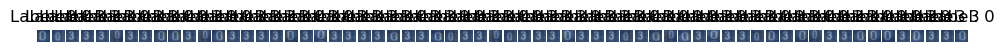

In [147]:
def show_images(images, labels):
    plt.figure(figsize=(12, 6))
    for i in range(images.size(0)):
        plt.subplot(1, 64, i + 1)
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        plt.imshow(img)
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Display the batch of images
show_images(data, label)



In [1]:
! pip install Augmentor 

You should consider upgrading via the 'C:\Users\Ali\Desktop\DIG\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [41]:
import Augmentor
import os


original_images_path = r"C:\Users\Ali\Desktop\DIG\Noisee_denoise\labels\noise_lableing\99"
output_path = r"C:\Users\Ali\Desktop\DIG\Noisee_denoise\labels\crop_noise_labeling\test"
# os.mkdir(output_path)



pipeline = Augmentor.Pipeline(original_images_path, output_directory=output_path)


# Define augmentation operations

#pipeline.zoom_random(probability=0.5, percentage_area=0.8)
#pipeline.rotate(probability=.8, max_left_rotation=10, max_right_rotation=10)
#pipeline.shear(probability=.2, max_shear_left=20, max_shear_right=20)
# Add more augmentation operations as needed
pipeline.crop_centre(probability=1,percentage_area=.6)

# Set the number of augmented images to generate
num_augmented_images = 135

# Execute the augmentation
pipeline.sample(num_augmented_images)

print("Augmentation complete. Augmented images saved to:", output_path)


Initialised with 135 image(s) found.
Output directory set to C:\Users\Ali\Desktop\DIG\Noisee_denoise\labels\crop_noise_labeling\test.

Executing Pipeline:   0%|          | 0/135 [00:00<?, ? Samples/s]

Processing <PIL.Image.Image image mode=RGB size=134x134 at 0x1E7039F8FA0>: 100%|██████████| 135/135 [00:00<00:00, 250.21 Samples/s]

Augmentation complete. Augmented images saved to: C:\Users\Ali\Desktop\DIG\Noisee_denoise\labels\crop_noise_labeling\test


In [44]:
import cv2
img1 = cv2.imread(r'C:\Users\Ali\Desktop\DIG\Noisee_denoise\labels\crop_noise_labeling\test\e.png')
img2 = cv2.imread(r'C:\Users\Ali\Desktop\DIG\Noisee_denoise\labels\crop_noise_labeling\test\f.png')
dis = img2 - img1
print(dis.sum())

0


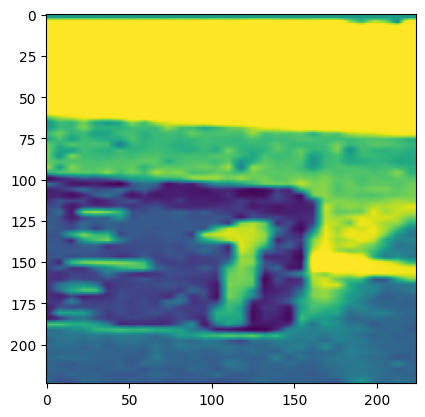

In [170]:
a = cv2.imread(r'C:\Users\Ali\Desktop\DIG\dd\Bri_sharp\11\augmented_338_brightness_0.9527601599693298.png')
a = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
plt.imshow(a) 

In [210]:
r"C:\Users\Ali\Desktop\DIG\dd" + '\\' + str(4) + str(4)

'C:\\Users\\Ali\\Desktop\\DIG\\dd\\44'